# Final Project Part 3

Following discoveries in part 2, I have reformatted the data being used in the model, exchanging flags for counts where possible (including the taget variable), including email received counts both prior and recent. Following advice I will also be using the full dataset of close to a million rows in the model

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics
from pathlib import Path

%matplotlib inline

### Import Raw Data

In [10]:
engagement_raw = pd.read_csv('../engagement_full.csv')

In [11]:
engagement_raw.head(5)

,email,launch_id,cellcode,date_launched,region,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,has_precise_code_match,codes_in_discipline,engagements,engaged
0,00008394@ufrgs.br,92170,HOUSE,3/30/2019,UK,0,0,189,16,9,0,0,0,0,0,0,1,0,0
1,00010389@whu.edu.cn,92170,HOUSE,3/30/2019,APAC,1,1,6,7,0,0,0,0,0,0,0,1,0,0
2,000903@nuist.edu.cn,92170,HOUSE,3/30/2019,APAC,1,1,2,3,0,0,0,2,0,2,0,1,0,0
3,001_xiangyang@tongji.edu.cn,92170,HOUSE,3/30/2019,APAC,1,1,155,23,15,0,0,3,0,0,0,1,0,0
4,006579@yzu.edu.cn,92170,ST,3/30/2019,APAC,1,1,75,36,69,30,0,3,0,0,0,1,0,0


### Check target variables

In addition to counts for the features of the model, the data now includes the number of engagements as well as the fact of engagement. I will check the distribution of the engagement count, and run both target variables into basic Logistic Regression to determine which target variable to use in the final models

In [12]:
engagement_raw.loc[:, 'engagements'].value_counts()

0     732687
1     187780
2       8946
3       1170
4        324
8        297
9        269
10       249
7        203
6        154
5        154
11       144
12        67
13        16
14         9
16         2
Name: engagements, dtype: int64

In [13]:
engagement_raw.loc[:, 'engaged'].value_counts()

0    732687
1    199784
Name: engaged, dtype: int64

93% of contacts who engaged only did so once... this may cause noise and challenges in interpretation, but will test out in models 

### Exploring data

In [15]:
engagement_raw.shape

(932471, 19)

In [16]:
engagement_raw.columns

Index(['email', 'launch_id', 'cellcode', 'date_launched', 'region',
       'is_academic_email', 'is_china_recipient', 'prior_received',
       'recent_received', 'prior_responses', 'recent_responses',
       'prior_submissions_subject', 'prior_submissions_discipline',
       'recent_submissions_subject', 'recent_submissions_discipline',
       'has_precise_code_match', 'codes_in_discipline', 'engagements',
       'engaged'],
      dtype='object')

In [21]:
engagement_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932471 entries, 0 to 932470
Data columns (total 19 columns):
email                            932471 non-null object
launch_id                        932471 non-null int64
cellcode                         932471 non-null object
date_launched                    932471 non-null object
region                           932471 non-null object
is_academic_email                932471 non-null int64
is_china_recipient               932471 non-null int64
prior_received                   932471 non-null int64
recent_received                  932471 non-null int64
prior_responses                  932471 non-null int64
recent_responses                 932471 non-null int64
prior_submissions_subject        932471 non-null int64
prior_submissions_discipline     932471 non-null int64
recent_submissions_subject       932471 non-null int64
recent_submissions_discipline    932471 non-null int64
has_precise_code_match           932471 non-null int64
codes

In [22]:
engagement_raw.dtypes

email                            object
launch_id                         int64
cellcode                         object
date_launched                    object
region                           object
is_academic_email                 int64
is_china_recipient                int64
prior_received                    int64
recent_received                   int64
prior_responses                   int64
recent_responses                  int64
prior_submissions_subject         int64
prior_submissions_discipline      int64
recent_submissions_subject        int64
recent_submissions_discipline     int64
has_precise_code_match            int64
codes_in_discipline               int64
engagements                       int64
engaged                           int64
dtype: object

In [23]:
engagement_raw.isna().sum()

email                            0
launch_id                        0
cellcode                         0
date_launched                    0
region                           0
is_academic_email                0
is_china_recipient               0
prior_received                   0
recent_received                  0
prior_responses                  0
recent_responses                 0
prior_submissions_subject        0
prior_submissions_discipline     0
recent_submissions_subject       0
recent_submissions_discipline    0
has_precise_code_match           0
codes_in_discipline              0
engagements                      0
engaged                          0
dtype: int64

In [17]:
engagement_raw.describe()

,launch_id,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,has_precise_code_match,codes_in_discipline,engagements,engaged
count,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.00000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000,932471.000000
mean,78171.367791,0.350539,0.362749,115.363895,23.353901,22.605042,5.29399,0.326025,1.281755,0.050768,0.197379,0.033024,1.368852,0.239829,0.214252
std,8519.231375,0.477139,0.480794,94.812789,12.817104,34.202984,8.30012,0.951367,2.223821,0.307813,0.671141,0.178700,2.196847,0.569788,0.410303
min,62490.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68068.000000,0.000000,0.000000,46.000000,15.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,76158.000000,0.000000,0.000000,88.000000,21.000000,9.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,87249.000000,1.000000,1.000000,165.000000,31.000000,29.000000,7.00000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,92170.000000,1.000000,1.000000,929.000000,124.000000,606.000000,108.00000,27.000000,88.000000,13.000000,26.000000,1.000000,43.000000,16.000000,1.000000


In [18]:
engagement_raw.describe(include='object')

,email,cellcode,date_launched,region
count,932471,932471,932471,932471
unique,152291,5,22,5
top,h.ouyang@liverpool.ac.uk,ST,2/12/2019,APAC
freq,24,539238,105178,425408


The cellcode field should only have 3 values but is showing 5. Investigate and address the issue

In [24]:
engagement_raw.loc[:, 'cellcode'].value_counts()

ST       539238
HOUSE    361354
NH        20870
ST1        6363
ST2        4646
Name: cellcode, dtype: int64

In [27]:
# ST1 and ST2 have no significance over ST - replace these values, and clarify the meanings by renaming all columns

engagement_raw.loc[:, 'cellcode'] = engagement_raw.loc[:, 'cellcode'].replace(['ST','ST1', 'ST2'],'SAGETrack')
engagement_raw.loc[:, 'cellcode'] = engagement_raw.loc[:, 'cellcode'].replace('HOUSE','House')
engagement_raw.loc[:, 'cellcode'] = engagement_raw.loc[:, 'cellcode'].replace('NH','Non_House')

engagement_raw.loc[:, 'cellcode'].value_counts()

SAGETrack    550247
House        361354
Non_House     20870
Name: cellcode, dtype: int64

Drop unneeded columns and dummy cellcode and region field

In [28]:
engagement_raw = engagement_raw.drop(['email','launch_id', 'date_launched'], axis='columns')

In [29]:
engagement_raw = pd.get_dummies(engagement_raw, drop_first=True)

In [30]:
engagement_raw.shape

(932471, 20)

In [ ]:
# Visualize correlation
fig, ax = plt.subplots(figsize=(20,14))         
sns.heatmap(engaged.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, annot=True, ax=ax);

### Test Engagements v Engaged

In [32]:
# Engagements Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engagements'

X = engagement_raw.drop(['engagements','engaged'], axis='columns')
y = engagement_raw.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.853632066163917

In [36]:
# Engaged Logistic Regression

target_col = 'engaged'

X = engagement_raw.drop(['engagements','engaged'], axis='columns')
y = engagement_raw.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8601395001672972

Model is showing 85% on engagments, 86% on engaged against 78% actual so in both cases there is more signal from the features than the first pass using mainly flags. As engaged performed slightly better, proves easier to interpret, and for business purposes the fact of engagement is more pertinent than the number of engagements, I shall proceed with the engaged dataset

In [37]:
engaged = engagement_raw.drop('engagements', axis='columns')

In [38]:
engaged.head()

,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,has_precise_code_match,codes_in_discipline,engaged,cellcode_Non_House,cellcode_SAGETrack,region_India,region_UK,region_US,region_Unknown
0,0,0,189,16,9,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,1,6,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,2,3,0,0,0,2,0,2,0,1,0,0,0,0,0,0,0
3,1,1,155,23,15,0,0,3,0,0,0,1,0,0,0,0,0,0,0
4,1,1,75,36,69,30,0,3,0,0,0,1,0,0,1,0,0,0,0


### Generating prior and recent response rates

In [39]:
engaged.loc[:, 'prior_response_rate'] = (engaged.loc[:, 'prior_responses'] / engaged.loc[:, 'prior_received']).astype(float)
engaged.loc[:, 'recent_response_rate'] = (engaged.loc[:, 'recent_responses'] / engaged.loc[:, 'recent_received']).astype(float)

In [40]:
engaged.isna().sum()

is_academic_email                    0
is_china_recipient                   0
prior_received                       0
recent_received                      0
prior_responses                      0
recent_responses                     0
prior_submissions_subject            0
prior_submissions_discipline         0
recent_submissions_subject           0
recent_submissions_discipline        0
has_precise_code_match               0
codes_in_discipline                  0
engaged                              0
cellcode_Non_House                   0
cellcode_SAGETrack                   0
region_India                         0
region_UK                            0
region_US                            0
region_Unknown                       0
prior_response_rate              17620
recent_response_rate                 0
dtype: int64

In [41]:
# address missing data in newly created prior_reponse_rate
engaged.loc[:, 'prior_response_rate'] = engaged.loc[:, 'prior_response_rate'].fillna(0)

In [42]:
engaged.isna().sum()

is_academic_email                0
is_china_recipient               0
prior_received                   0
recent_received                  0
prior_responses                  0
recent_responses                 0
prior_submissions_subject        0
prior_submissions_discipline     0
recent_submissions_subject       0
recent_submissions_discipline    0
has_precise_code_match           0
codes_in_discipline              0
engaged                          0
cellcode_Non_House               0
cellcode_SAGETrack               0
region_India                     0
region_UK                        0
region_US                        0
region_Unknown                   0
prior_response_rate              0
recent_response_rate             0
dtype: int64

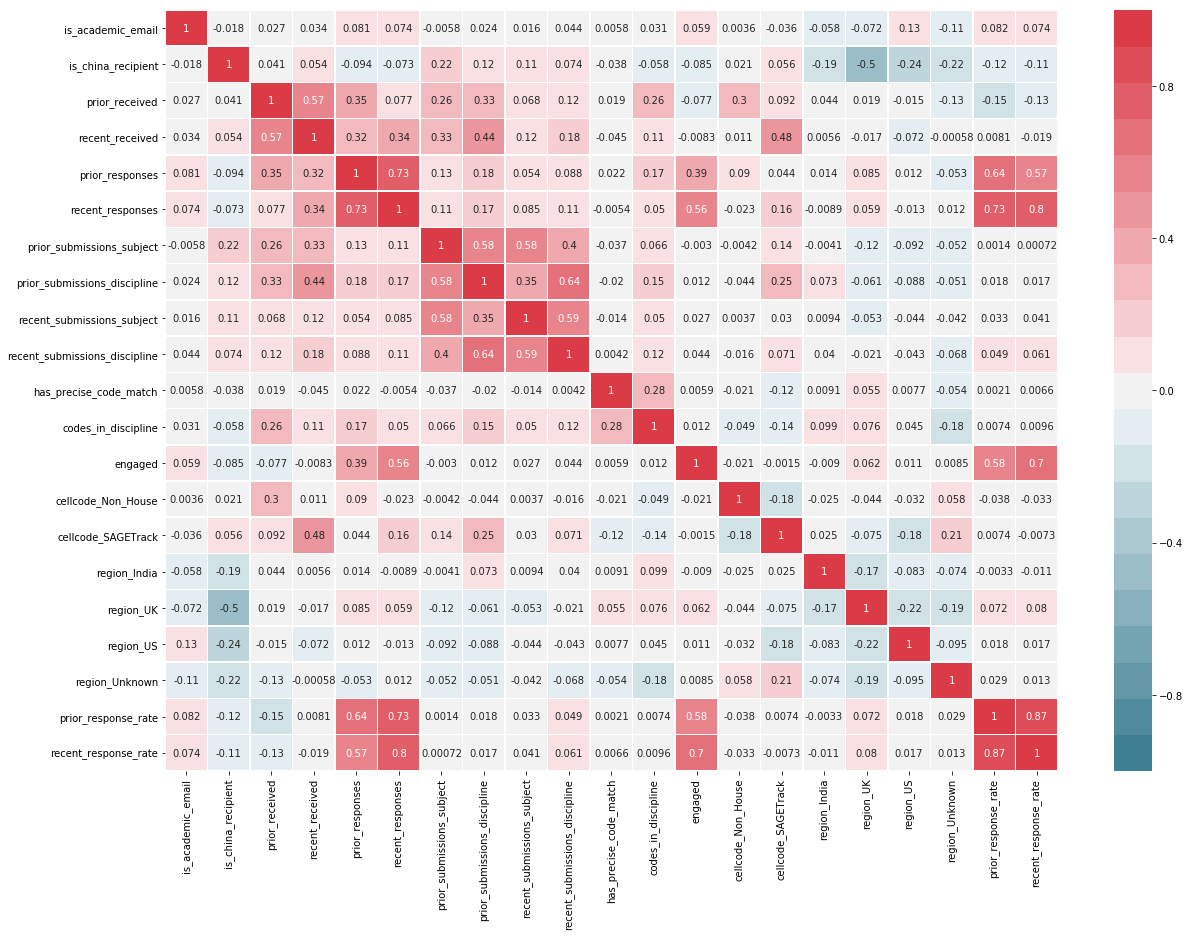

In [43]:
# Re-run correlation mapping with rates included

fig, ax = plt.subplots(figsize=(20,14))         
sns.heatmap(engaged.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, annot=True, ax=ax);

Newly created response rates are now showing the largest correlations in the model (but may be co-correlated with the figures that informed them)

## Testing multiple models

### Logistic regression (re-run including rates)

In [106]:
target_col = 'engaged'

X = engaged.drop(target_col, axis='columns')
y = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8791239903167642
0.8782161823625804


### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.9962350915775009
0.847806690174075


### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9864031469086427
0.8780317264218122


On first pass, Logistic Regression performing the best, with train and test sets very similar, and still showing a 10% improvement over the null model. Decision Tree and Random Forest models are overfitting (as train scores close to prefect) so will aim to tune the hyperparamaters to reduce the models' flexibility

In [71]:
dtc = DecisionTreeClassifier(max_depth=10)

dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.8864235943793763
0.8849809967484278


I manually ran multiple iterations of the DTC tuning the max_depth to achieve the balance of the highest train and test scores and smallest gap between the two. For purposes of takeaways however, a max_depth of 7 sacrifices a very small percentage of the accuracy for greater interpretability

In [55]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=12, oob_score=True)

rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8899139633346822
0.8840758757367514


Likewise, I manually ran multiple iterations of the these three hyperparamaters, settling on the above combination as the best balance of train, test, and gap between the two

Max Depth    Train Score    Test Score
5              87.58%         87.50%
10             88.45%         88.27%
15             90.02%         88.66%
13             89.26%         88.67%
12             88.99%         88.40%

### View Decision Tree at max_depth of 7

In [72]:
dtc = DecisionTreeClassifier(max_depth=7)

dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.8833150068706361
0.8825959385375647


In [73]:
# Set up paths for tree diagram files
images_dir = '../assets/images'
dotfile_path = f'{images_dir}/eng_tree.dot'
png_path = f'{images_dir}/eng_tree.png'

In [74]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file=dotfile_path, feature_names=X.columns)

In [75]:
# Convert the graphviz file to PNG
!dot -Tpng {dotfile_path} -o {png_path}

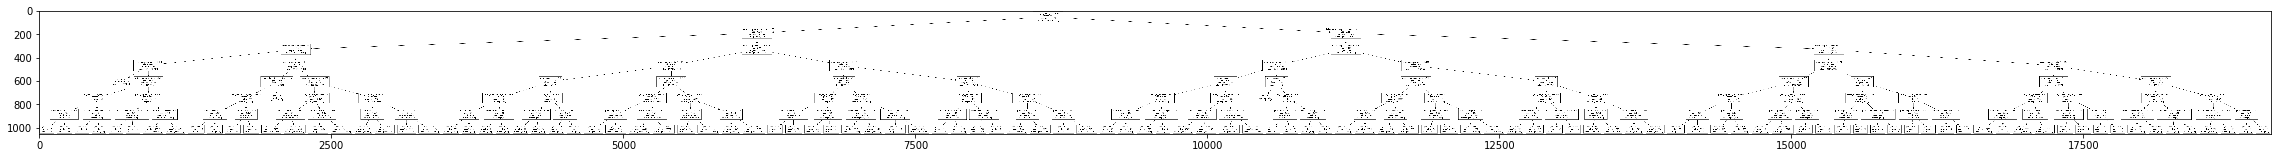

In [76]:
# Show the PNG
tree_image = plt.imread(png_path)
fig,ax = plt.subplots(figsize=(40,40))
ax.imshow(tree_image);

### Feature Importances of Tree and Forest models

In [56]:
sorted(zip(dtc.feature_importances_, X.columns))[::-1]

[(0.9244442231843366, 'recent_response_rate'),
 (0.034285501520951674, 'prior_response_rate'),
 (0.014743224387591338, 'prior_responses'),
 (0.013073874861453037, 'prior_received'),
 (0.0048474008985574385, 'recent_responses'),
 (0.004488020134675912, 'recent_received'),
 (0.001540868852770843, 'is_china_recipient'),
 (0.0008248937874559676, 'codes_in_discipline'),
 (0.0003938937384257901, 'cellcode_SAGETrack'),
 (0.0003548148434457879, 'prior_submissions_discipline'),
 (0.00027191409756918217, 'is_academic_email'),
 (0.00016501218809324315, 'prior_submissions_subject'),
 (0.00012180565756233353, 'recent_submissions_discipline'),
 (0.00011323700226959054, 'region_UK'),
 (8.959067911329808e-05, 'region_Unknown'),
 (7.789694283793831e-05, 'has_precise_code_match'),
 (5.582540545309402e-05, 'recent_submissions_subject'),
 (4.263591492387192e-05, 'cellcode_Non_House'),
 (3.8057617186980124e-05, 'region_US'),
 (2.7308285326070744e-05, 'region_India')]

In [57]:
sorted(zip(rfc.feature_importances_, X.columns))[::-1]

[(0.4172957921241169, 'recent_response_rate'),
 (0.2820748292075192, 'recent_responses'),
 (0.1657195730958415, 'prior_response_rate'),
 (0.07522896982763225, 'prior_responses'),
 (0.022893794777083483, 'recent_received'),
 (0.01738278232324259, 'prior_received'),
 (0.0034422614373735973, 'is_china_recipient'),
 (0.003221677398454516, 'prior_submissions_discipline'),
 (0.0025318064140264322, 'codes_in_discipline'),
 (0.0021911559151307305, 'cellcode_SAGETrack'),
 (0.001580207313963617, 'recent_submissions_discipline'),
 (0.0015501843369491015, 'is_academic_email'),
 (0.001440499964181135, 'prior_submissions_subject'),
 (0.0011782517242445965, 'region_UK'),
 (0.0006976725135777332, 'recent_submissions_subject'),
 (0.0003799521587452324, 'region_India'),
 (0.0003469004346328471, 'region_US'),
 (0.00031768534807451773, 'has_precise_code_match'),
 (0.00030115819875119827, 'region_Unknown'),
 (0.00022484548645862652, 'cellcode_Non_House')]

In the correlation heatmap of the Logistic Regression model, and in the feature importances of both Decision Tree and Random Forest models, the features surrounding prior and recent response show the strongest correlation and the highest ranked features in the models' predictions 

## Further investigation of these operative features

View scatterplots of key features

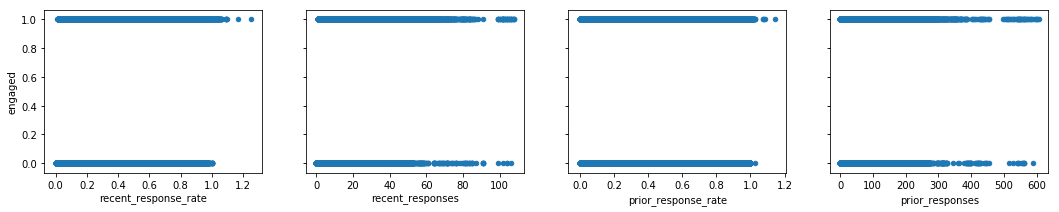

In [69]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(18, 3))

engaged.plot(kind='scatter', x='recent_response_rate', y='engaged', ax=ax0)
engaged.plot(kind='scatter', x='recent_responses', y='engaged', ax=ax1)
engaged.plot(kind='scatter', x='prior_response_rate', y='engaged', ax=ax2)
engaged.plot(kind='scatter', x='prior_responses', y='engaged', ax=ax3);

... both recent_response_rate and prior_response_rate are showing cases with > 100% ... this points to some margin of error in the data being used (databases were in flux during the sourcing of this data, and would estimate the prior and recent received figures are incorrect)... as a result, while I was planning to map probability thresholds based on these rates, I feel more confident basing them on the actuall response numbers

In [59]:
feature_cols = ['prior_responses']
target_col = 'engaged'

X = engaged.loc[:, feature_cols]
y = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8018900299419178

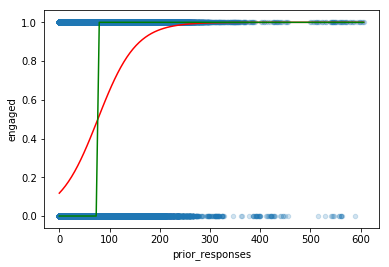

In [60]:
x_grid = np.linspace(start=engaged.loc[:, 'prior_responses'].min(), stop=engaged.loc[:, 'prior_responses'].max(), num=100)
pred_probs = lr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr.predict(x_grid.reshape(-1, 1))
ax = engaged.plot(kind='scatter', x='prior_responses', y='engaged', alpha=.2)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

In [61]:
feature_cols = ['recent_responses']
target_col = 'engaged'

X = engaged.loc[:, feature_cols]
y = engaged.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8397764222410968

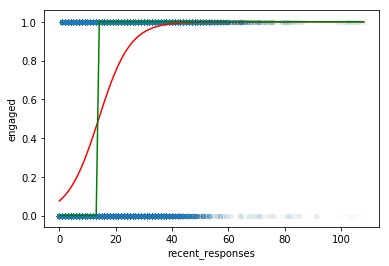

In [62]:
x_grid = np.linspace(start=engaged.loc[:, 'recent_responses'].min(), stop=engaged.loc[:, 'recent_responses'].max(), num=100)
pred_probs = lr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr.predict(x_grid.reshape(-1, 1))
ax = engaged.plot(kind='scatter', x='recent_responses', y='engaged', alpha=.02)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

The above plots demonstrate that a recipient has a greater than 50% chance of engaging if they have previously responded to c.70 emails, or recently responded to c.12 emails

Test accuracy, recall and precision of recent_response model

In [64]:
from sklearn import metrics

y_pred = lr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[175095,   7827],
       [ 29524,  20672]], dtype=int64)

In [65]:
print('precision:', metrics.precision_score(y_test, y_pred))
print('recall:', metrics.recall_score(y_test, y_pred))

precision: 0.725358784518755
recall: 0.41182564347756795


In [67]:
y_pred_prob = lr.predict_proba(X_test)[:, 1]

for threshold in np.linspace(y_pred_prob.min(), y_pred_prob.max(), 5):
    y_pred_thresh = y_pred_prob > threshold
    print('threshold:', threshold)
    print('precision:', metrics.precision_score(y_test, y_pred_thresh))
    print('recall:', metrics.recall_score(y_test, y_pred_thresh))
    print('f1:', metrics.f1_score(y_test, y_pred_thresh))
    print('f2:', metrics.fbeta_score(y_test, y_pred_thresh, 2))
    print('f1/2:', metrics.fbeta_score(y_test, y_pred_thresh, .5))
    print()

threshold: 0.07502495348690771
precision: 0.3411862263971398
recall: 1.0
f1: 0.5087827770401079
f2: 0.7214017579461118
f1/2: 0.3929642828065209

threshold: 0.3062686980850152
precision: 0.6469819646146596
recall: 0.6017411745955853
f1: 0.6235420408331785
f2: 0.6102759930496626
f1/2: 0.6373976534143665

threshold: 0.5375124426831227
precision: 0.725358784518755
recall: 0.41182564347756795
f1: 0.5253700997522078
f2: 0.4507966137916897
f1/2: 0.6295069187292924

threshold: 0.7687561872812303
precision: 0.771528769970126
recall: 0.23667224480038251
f1: 0.3622282525840778
f2: 0.27476848211229427
f1/2: 0.53136293698787

threshold: 0.9999999318793378
precision: 0.0
recall: 0.0


C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1: 0.0
f2: 0.0
f1/2: 0.0



C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


While the problem in question merits paying attention to the precision, as the aim will be to maximise potential engagers, so the mid-range threshold of c.50% seems to  be most approriate (precision remains the higher value, without too much sacrifice of recall)

### Region specific thresholding

As the Asia Pacfic region is a valuable source of revenue, and they account for c.45% of the recipients of the data being modeled, and they engage at a lower rate than the RoW (Rest of World) it seems wise to determine if there are difference in this recent_responses threshold

In [89]:
engagement_region =  pd.read_csv('../engagement_full.csv')

In [90]:
engagement_region = engagement_region.drop(['email','launch_id', 'date_launched'], axis='columns')

In [91]:
engaged_apac = engagement_region.loc[engagement_region.loc[:, 'region'] == 'APAC']

In [92]:
engaged_ROW = engagement_region.loc[engagement_region.loc[:, 'region'] != 'APAC']

In [93]:
engaged_apac.shape

(425408, 16)

In [94]:
engaged_ROW.shape

(507063, 16)

In [95]:
engaged_apac = engaged_apac.drop('region', axis='columns')
engaged_apac = pd.get_dummies(engaged_apac, drop_first=True)

In [96]:
engaged_ROW = engaged_ROW.drop('region', axis='columns')
engaged_ROW = pd.get_dummies(engaged_ROW, drop_first=True)

In [97]:
target_col = 'engaged'

X_apac = engaged_apac.loc[:, ['recent_responses']]
y_apac = engaged_apac.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X_apac,y_apac)

lr_apac = LogisticRegression()

lr_apac.fit(X_train, y_train)
lr_apac.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8553482774183843

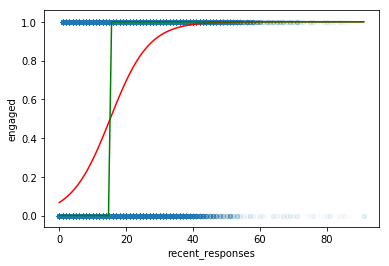

In [98]:
y_pred_prob_a = lr_apac.predict_proba(X_test)

x_grid = np.linspace(start=engaged_apac.loc[:, 'recent_responses'].min(), stop=engaged_apac.loc[:, 'recent_responses'].max(), num=100)
pred_probs = lr_apac.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_apac.predict(x_grid.reshape(-1, 1))
ax = engaged_apac.plot(kind='scatter', x='recent_responses', y='engaged', alpha=.02)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

In [100]:
target_col = 'engaged'

X_row = engaged_ROW.loc[:, ['recent_responses']]
y_row = engaged_ROW.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X_row,y_row)

lr_row = LogisticRegression()

lr_row.fit(X_train, y_train)
lr_row.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8297650789643911

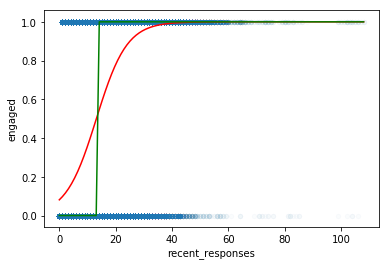

In [101]:
x_grid = np.linspace(start=engaged_ROW.loc[:, 'recent_responses'].min(), stop=engaged_ROW.loc[:, 'recent_responses'].max(), num=100)
pred_probs = lr_row.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_row.predict(x_grid.reshape(-1, 1))
ax = engaged_ROW.plot(kind='scatter', x='recent_responses', y='engaged', alpha=.02)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

Theory confirmed - APAC threshold appears to be more like 15 emails, RoW closer to 10 emails

### Notes

I did perform some test removing and adding features, testing co-correlation etc. however these did not significantly affect the model (process can be found in scratch version, ran out of time to transpose here) 

In [107]:
X_test.shape

(233118, 20)

In [108]:
X_train.shape

(699353, 20)

In [109]:
engaged.head()

,is_academic_email,is_china_recipient,prior_received,recent_received,prior_responses,recent_responses,prior_submissions_subject,prior_submissions_discipline,recent_submissions_subject,recent_submissions_discipline,...,codes_in_discipline,engaged,cellcode_Non_House,cellcode_SAGETrack,region_India,region_UK,region_US,region_Unknown,prior_response_rate,recent_response_rate
0,0,0,189,16,9,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0.047619,0.000000
1,1,1,6,7,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.000000,0.000000
2,1,1,2,3,0,0,0,2,0,2,...,1,0,0,0,0,0,0,0,0.000000,0.000000
3,1,1,155,23,15,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0.096774,0.000000
4,1,1,75,36,69,30,0,3,0,0,...,1,0,0,1,0,0,0,0,0.920000,0.833333
